# 1.ライブラリのインポート、CSVファイルの読み込み

In [104]:
#必要なライブラリをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
#CSVファイルの読み込み
df_train = pd.read_csv('bank_train.csv')
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


# 2.データの観察

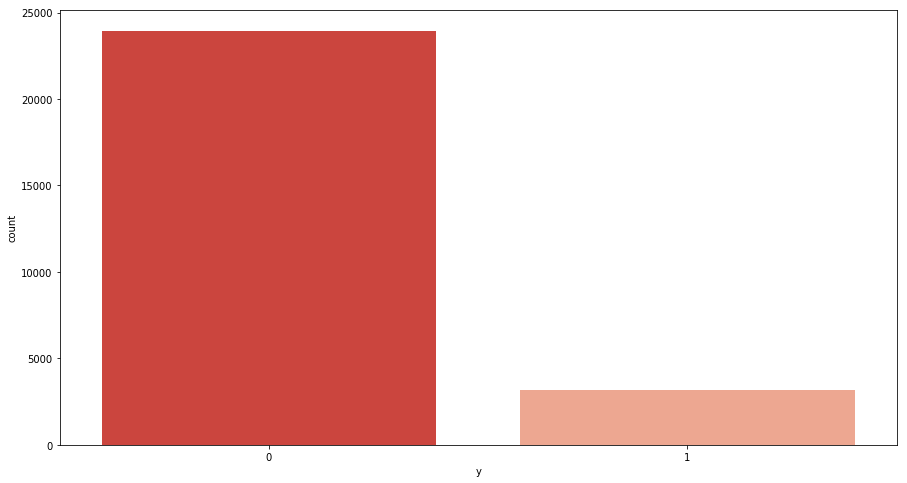

In [3]:
# 目的変数の分布
plt.figure(figsize=(15, 8))
sns.countplot(x="y", data=df_train,palette='Reds_r')

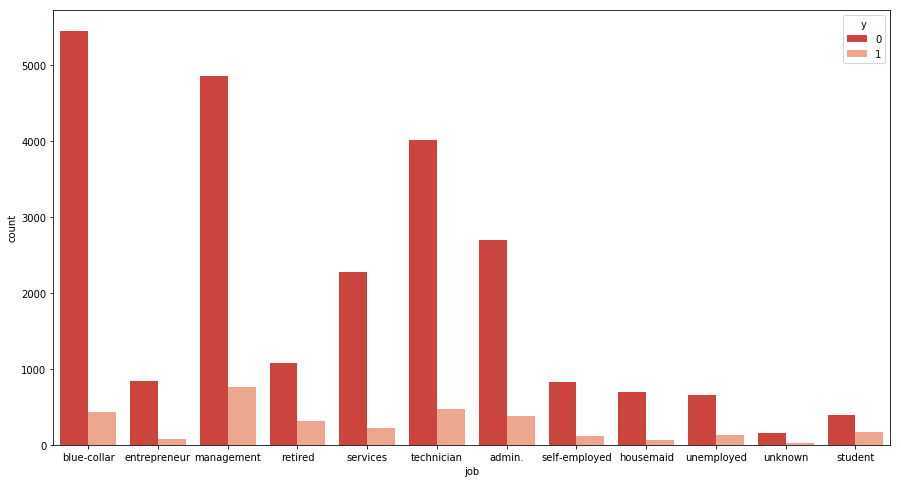

In [4]:
#職業別の分布
plt.figure(figsize=(15, 8))
sns.countplot(x="job", hue='y', data=df_train, palette='Reds_r')

In [5]:
#年齢の最大値・最小値を調べる
print(df_train['age'].max())
print(df_train['age'].min())

95
18


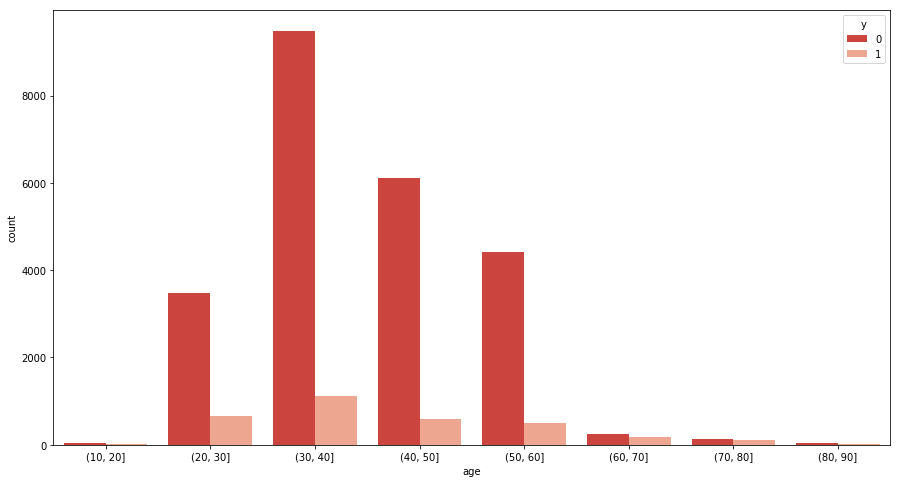

In [6]:
#年齢別の分布
plt.figure(figsize=(15, 8))
age_cut = pd.cut(df_train['age'], [10,20,30,40,50,60,70,80,90])
sns.countplot(x=age_cut, hue='y', data=df_train, palette='Reds_r')

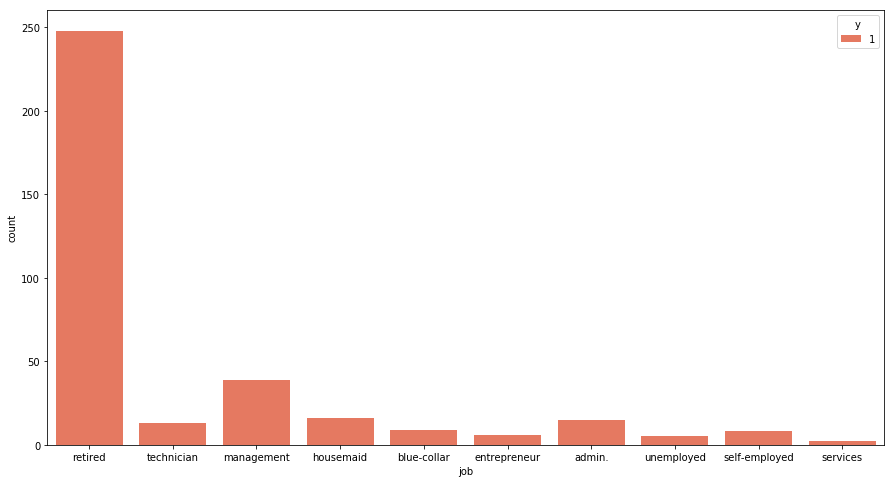

In [7]:
#60歳以上の口座開設者の職業を観察
plt.figure(figsize=(15, 8))
df_age60 = df_train.query('y==1&age>=60')
sns.countplot(x="job", hue='y', data=df_age60, palette='Reds_r')

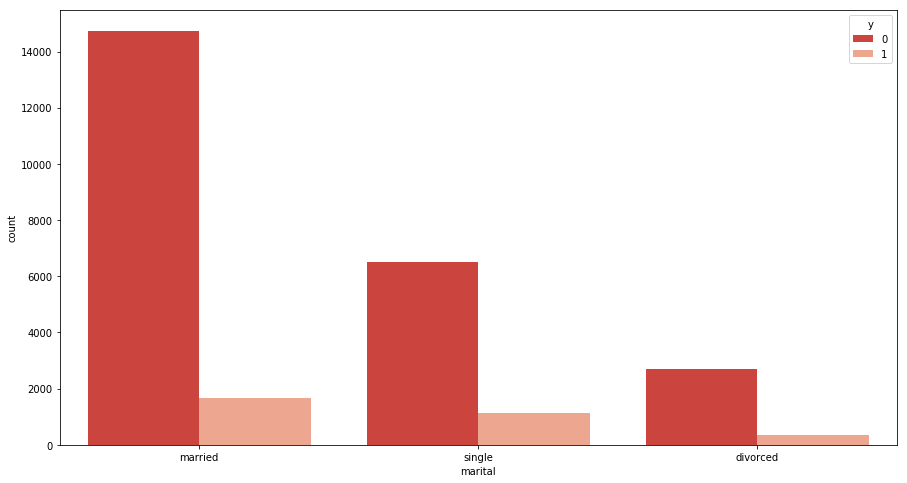

In [8]:
#結婚状況における分布
plt.figure(figsize=(15, 8))
sns.countplot(x="marital", hue='y', data=df_train, palette='Reds_r')

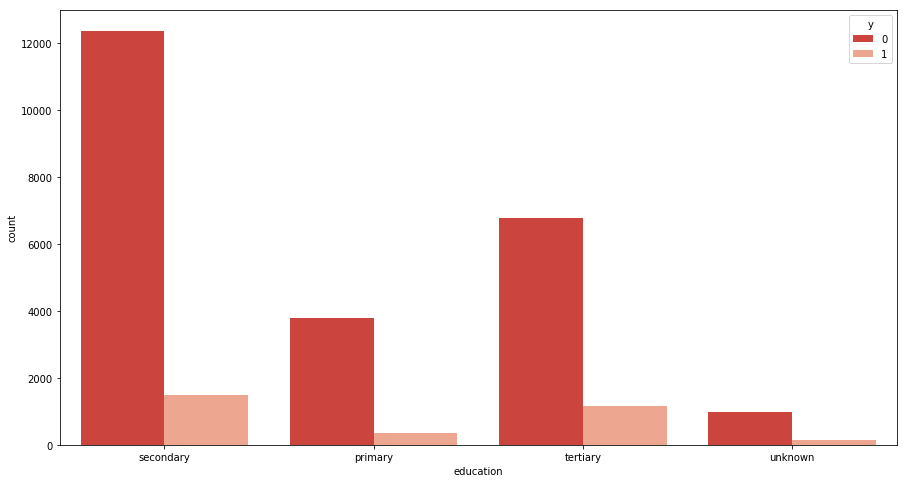

In [9]:
#教育水準における分布
plt.figure(figsize=(15, 8))
sns.countplot(x="education", hue='y', data=df_train, palette='Reds_r')

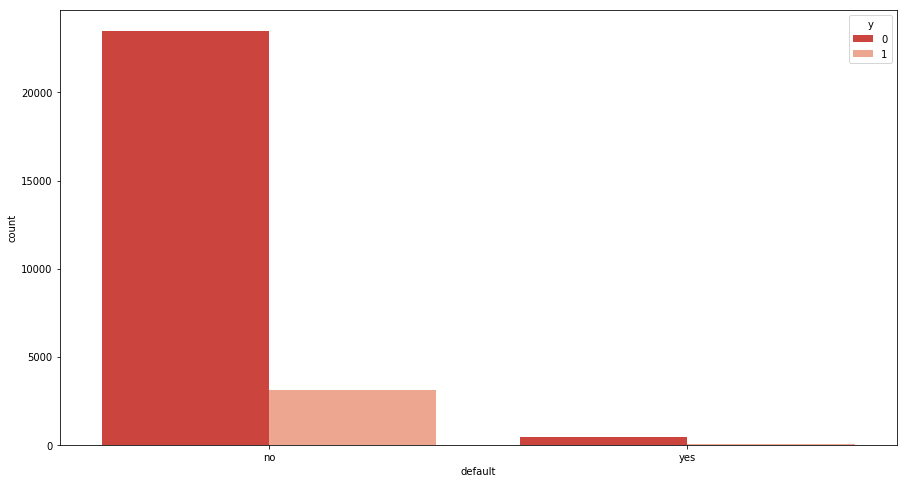

In [10]:
#債務履行における分布
plt.figure(figsize=(15, 8))
sns.countplot(x="default", hue='y', data=df_train, palette='Reds_r')

In [11]:
#年間平均残高の最大値・最小値を調べる
print(df_train['balance'].max())
print(df_train['balance'].min())

102127
-6847


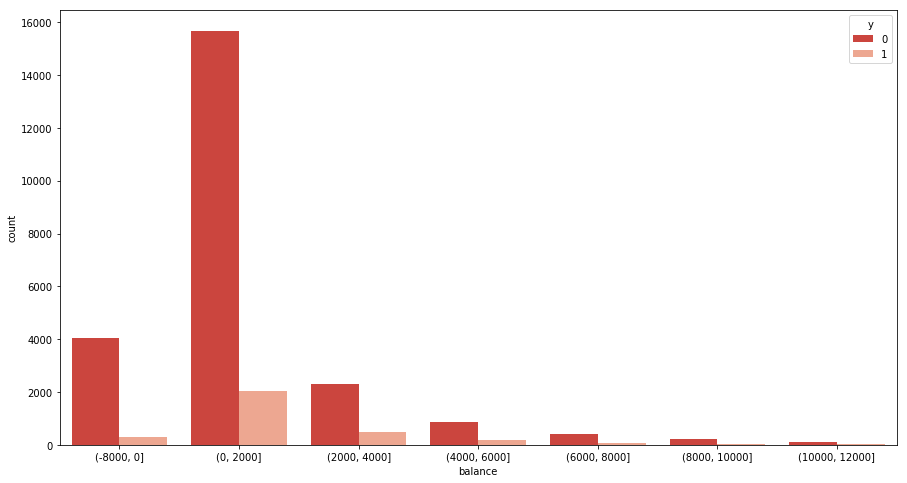

In [12]:
#年間平均残高における分布
plt.figure(figsize=(15, 8))
balance_cut = pd.cut(df_train['balance'], [-8000,  0,
                                    2000,  4000, 6000, 8000, 10000, 12000])
sns.countplot(x=balance_cut, hue='y', data=df_train, palette='Reds_r')

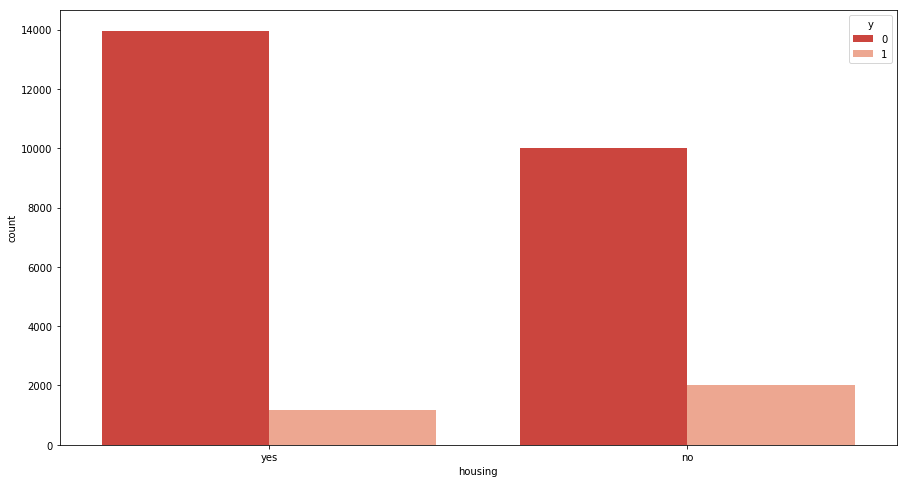

In [13]:
#住宅ローンにおける分布
plt.figure(figsize=(15, 8))
sns.countplot(x="housing", hue='y', data=df_train, palette='Reds_r')

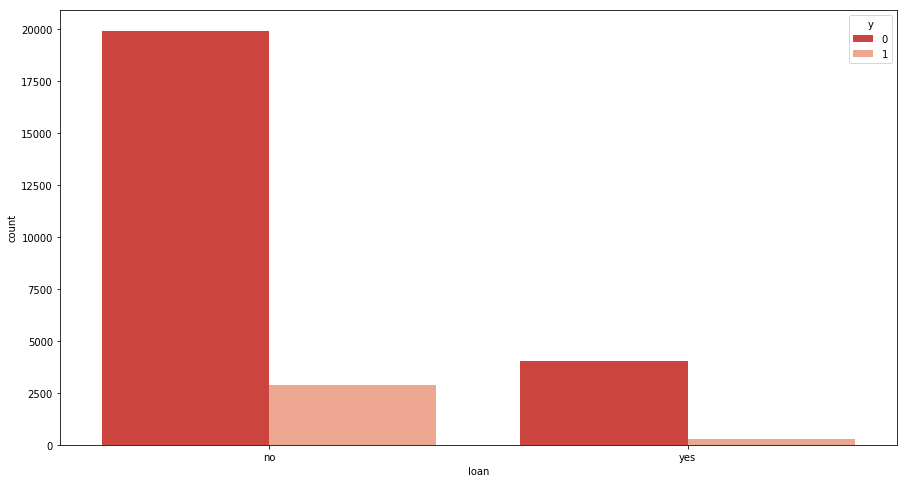

In [14]:
#個人ローンにおける分布
plt.figure(figsize=(15, 8))
sns.countplot(x="loan", hue='y', data=df_train, palette='Reds_r')

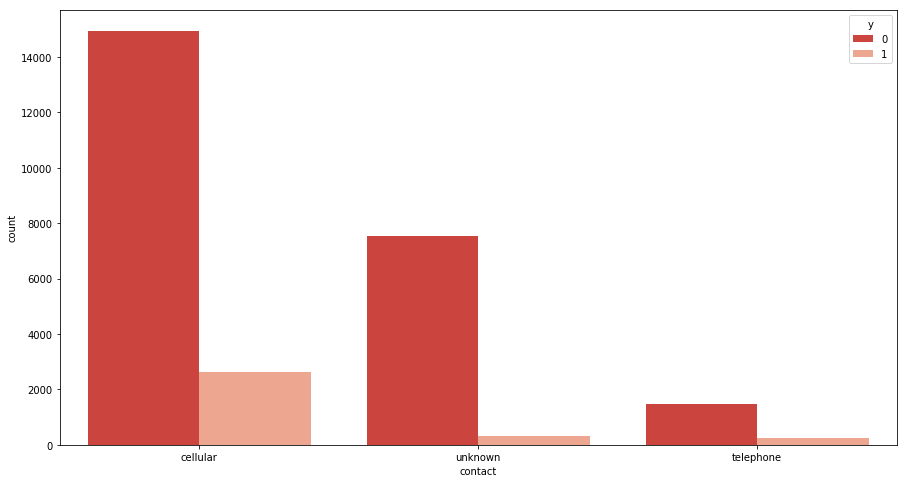

In [15]:
#接触方法における分布
plt.figure(figsize=(15, 8))
sns.countplot(x="contact", hue='y', data=df_train, palette='Reds_r')

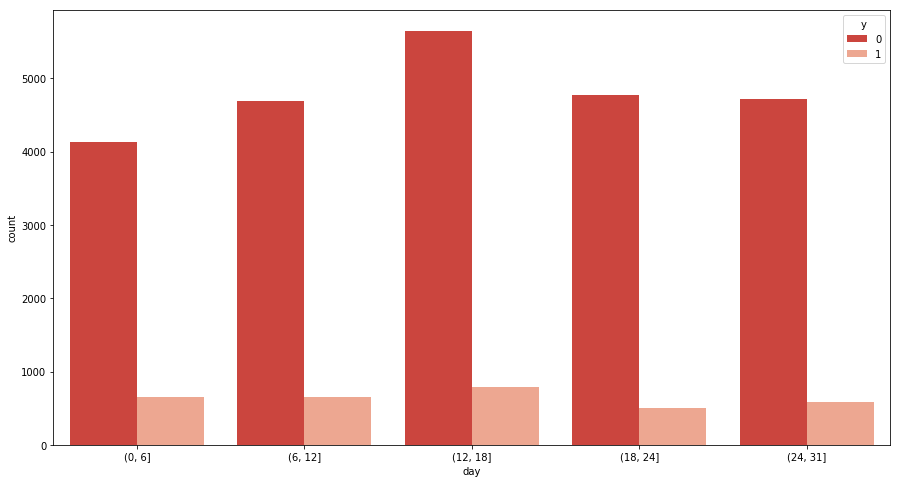

In [16]:
#最終接触日における分布
plt.figure(figsize=(15, 8))
day_cut = pd.cut(df_train['day'], [0, 6, 12,  18,  24, 31])
sns.countplot(x=day_cut, hue='y', data=df_train, palette='Reds_r')

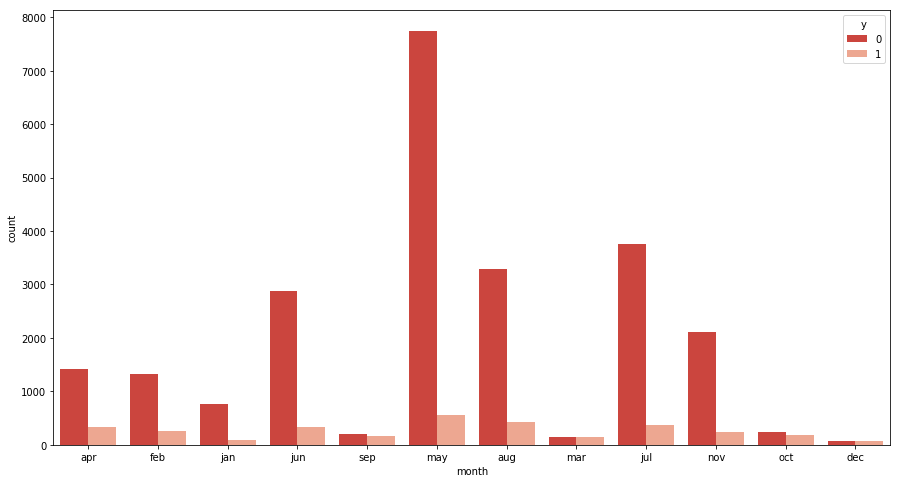

In [17]:
#最終接触月における分布
plt.figure(figsize=(15, 8))
sns.countplot(x="month", hue='y', data=df_train, palette='Reds_r')

In [18]:
#最終接触時間の最大値・最小値を調べる
print(df_train['duration'].max())
print(df_train['duration'].min())

4918
0


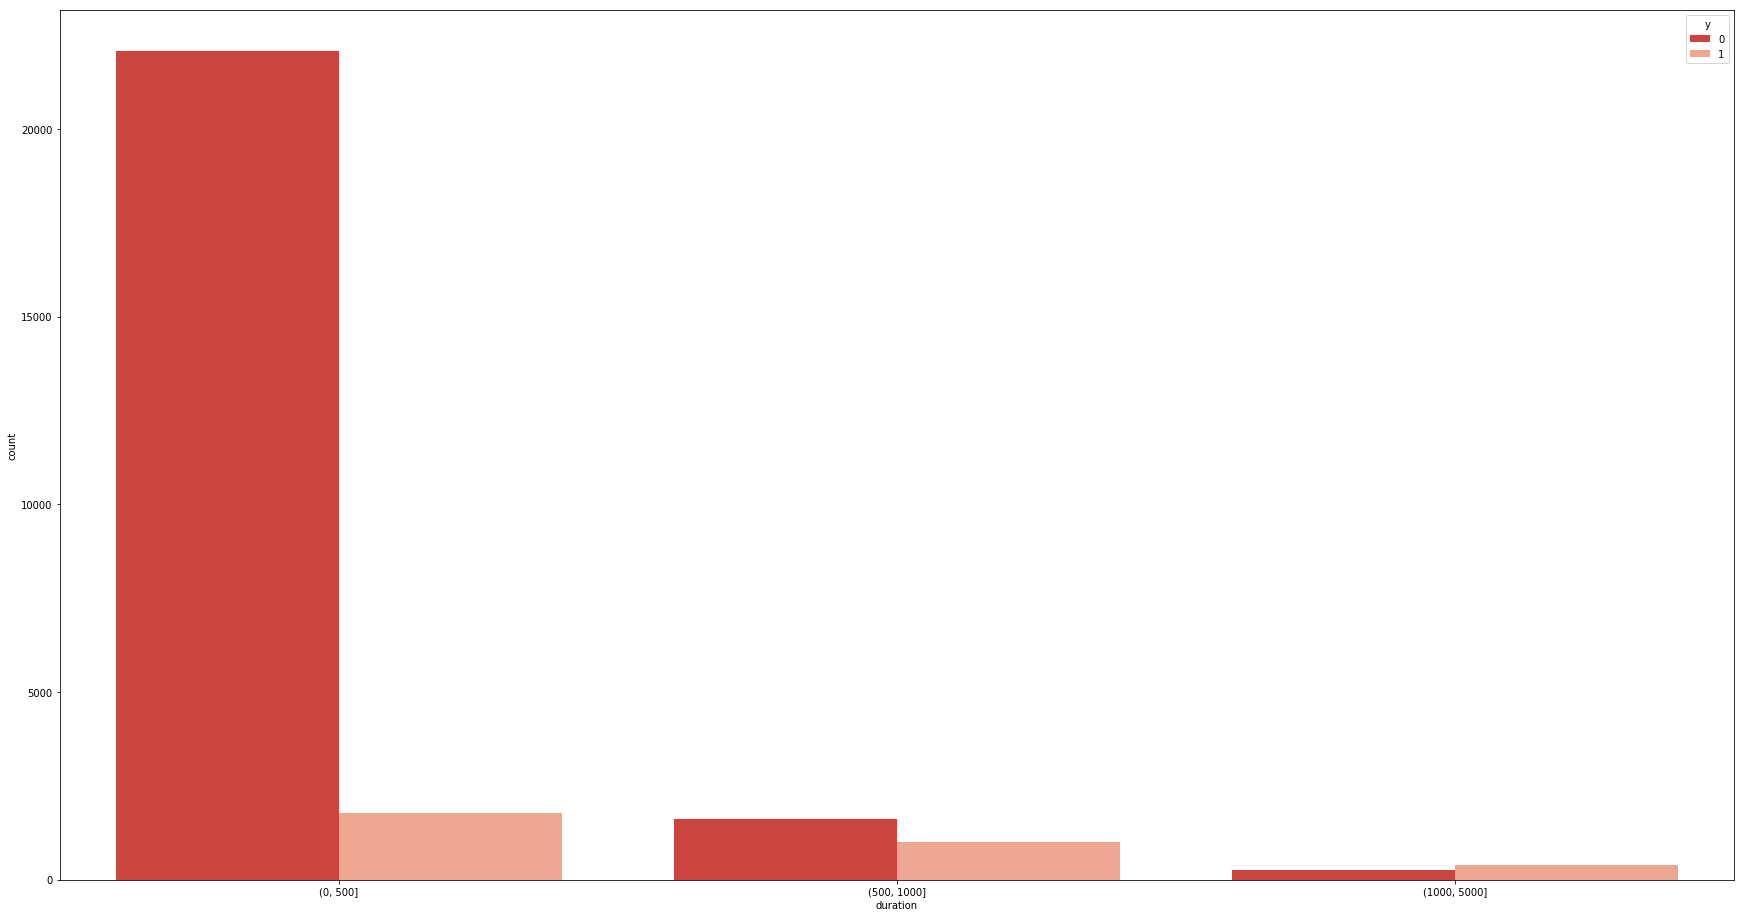

In [19]:
#最終接触時間における分布
plt.figure(figsize=(30, 16))
duration_cut = pd.cut(df_train['duration'], [0, 500, 1000,  5000])
sns.countplot(x=duration_cut, hue='y', data=df_train, palette='Reds_r')

In [20]:
#現キャンペーンにおける接触回数の最大値・最小値を調べる
print(df_train['campaign'].max())
print(df_train['campaign'].min())

63
1


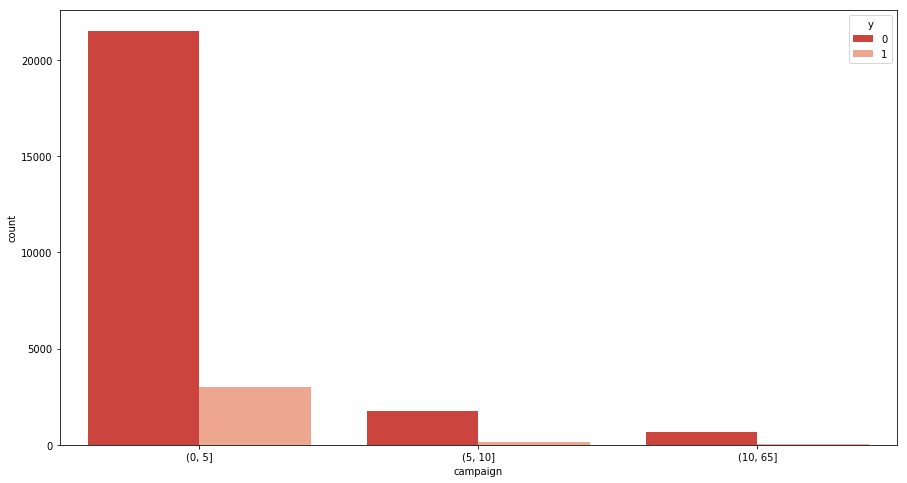

In [21]:
#現キャンペーンにおける接触回数における分布
plt.figure(figsize=(15, 8))
campaign_cut = pd.cut(df_train['campaign'], [0,5,10,65])
sns.countplot(x=campaign_cut, hue='y', data=df_train, palette='Reds_r')

In [22]:
#現キャンペーン以前までに顧客に接触した回数の最大値・最小値を調べる
print(df_train['previous'].max())
print(df_train['previous'].min())

275
0


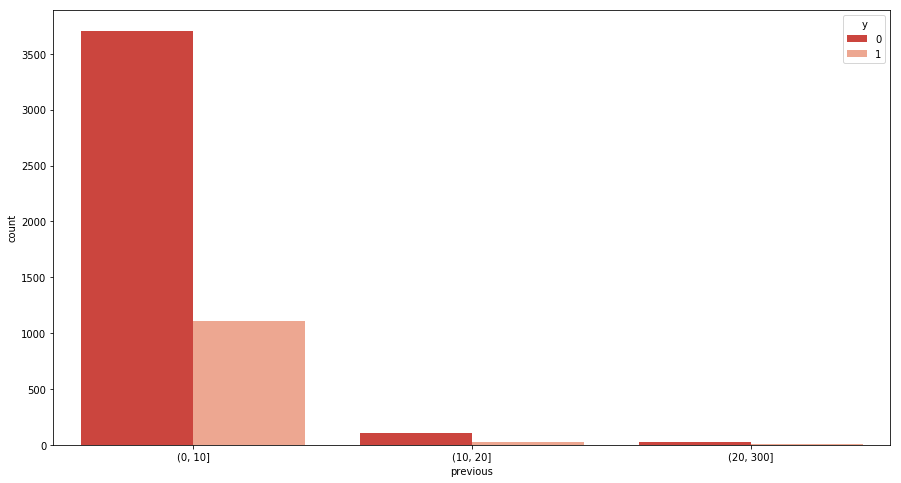

In [23]:
#現キャンペーン以前までに顧客に接触した回数における分布
plt.figure(figsize=(15, 8))
previous_cut = pd.cut(df_train['previous'], [0,10,20,300])
sns.countplot(x=previous_cut, hue='y', data=df_train, palette='Reds_r')

In [24]:
#経過日数の最大値・最小値
print(df_train['pdays'].max())
print(df_train['pdays'].min())

871
-1


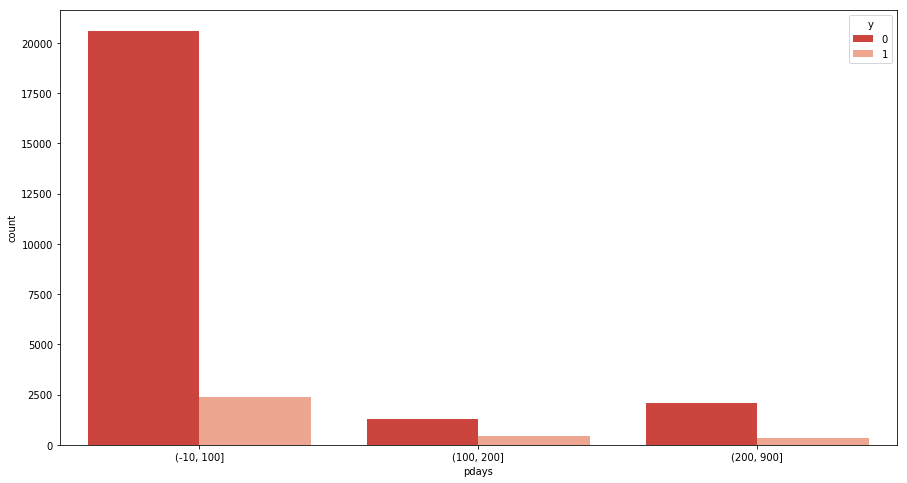

In [25]:
#経過日数における分布
plt.figure(figsize=(15, 8))
pdays_cut = pd.cut(df_train['pdays'], [-10,100,200,900])
sns.countplot(x=pdays_cut, hue='y', data=df_train, palette='Reds_r')

In [26]:
#現キャンペーンにおける接触回数と現キャンペーン以前までの接触回数を合計
df_train['campaign'] = df_train['campaign'] + df_train['previous']
df_train = df_train.drop('previous', axis=1)

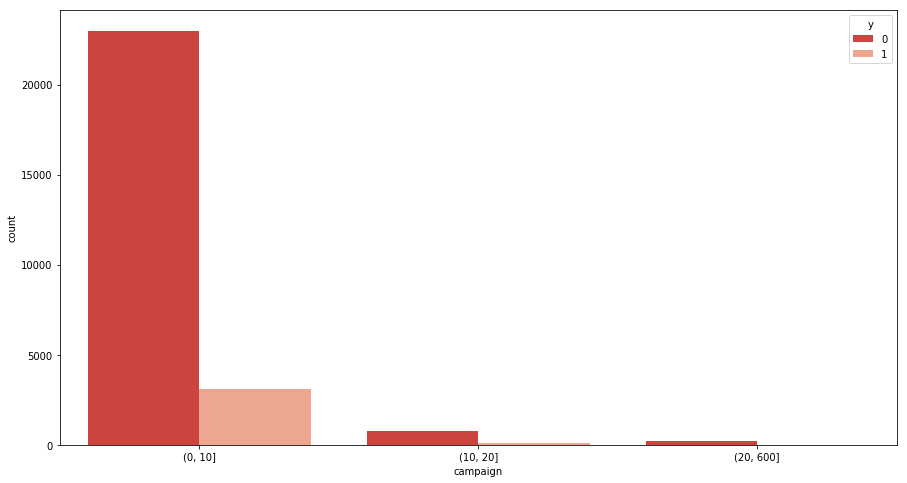

In [27]:
#合計接触回数における分布
plt.figure(figsize=(15, 8))
pdays_cut = pd.cut(df_train['campaign'],  [0,10,20,600])
sns.countplot(x=pdays_cut, hue='y', data=df_train, palette='Reds_r')

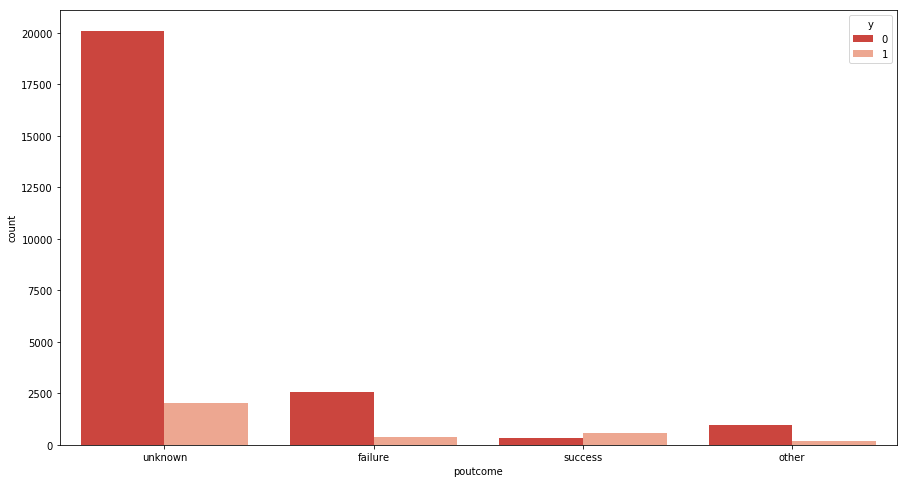

In [28]:
#前キャンペーン成果における分布
plt.figure(figsize=(15, 8))
sns.countplot(x="poutcome", hue='y', data=df_train, palette='Reds_r')

# 3.前処理

In [29]:
#分類問題のためカテゴリーデータのエンコーディングを行う
le = LabelEncoder()
le = le.fit(df_train['job'])
df_train['job'] = le.transform(df_train['job'])
le = le.fit(df_train['marital'])
df_train['marital'] = le.transform(df_train['marital'])
le = le.fit(df_train['education'])
df_train['education'] = le.transform(df_train['education'])
le = le.fit(df_train['default'])
df_train['default'] = le.transform(df_train['default'])
le = le.fit(df_train['housing'])
df_train['housing'] = le.transform(df_train['housing'])
le = le.fit(df_train['loan'])
df_train['loan'] = le.transform(df_train['loan'])
le = le.fit(df_train['contact'])
df_train['contact'] = le.transform(df_train['contact'])
month_mapping = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df_train['month'] = df_train['month'].map(month_mapping )
le = le.fit(df_train['poutcome'])
df_train['poutcome'] = le.transform(df_train['poutcome'])
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,1,39,1,1,1,0,1756,1,0,0,3,4,939,1,-1,3,1
1,2,51,2,1,0,0,1443,0,0,0,18,2,172,10,-1,3,1
2,3,36,4,2,2,0,436,0,0,0,13,4,567,3,595,0,1
3,4,63,5,1,1,0,474,0,0,0,25,1,423,1,-1,3,1
4,5,31,4,2,2,0,354,0,0,0,30,4,502,3,9,2,1


In [30]:
#trainデータとtestデータに分割
X = df_train.loc[:,'age':'poutcome']
y = df_train.loc[:,['y']].values.reshape(-1,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
#標準化を行う
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train) 
X_test_std = ss.fit_transform(X_test) 

# 4.勾配ブースティング木の実装

In [32]:
# 調整したいパラメータを指定
param_grid = {'max_depth': [3, 4, 5, 6, 7],
              'learning_rate': [0.001, 0.01, 0.1, 1, 10],}

In [33]:
# データの分割方法を指定（層化）
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [34]:
# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_gbct = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=kf)

In [35]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_gbct.fit(X_train_std,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7], 'learning_rate': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
gs_gbct.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

In [41]:
gbct = GradientBoostingClassifier(random_state=0, max_depth=5, learning_rate=0.1)
gbct.fit(X_train_std,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

train accuracy: 0.937
test  accuracy: 0.902


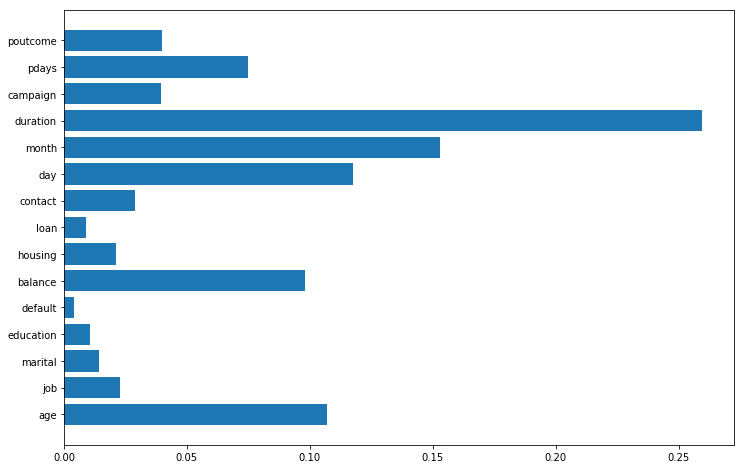

In [112]:
# 正答率、重要度を出力
print('train accuracy: %.3f' % gbct.score(X_train_std, y_train))
print('test  accuracy: %.3f' % gbct.score(X_test_std, y_test))
n_features = len(X.columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), gbct.feature_importances_ , align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.show()

# 5.語分類の傾向の観察

In [106]:
#trainデータ全てを標準化
X_std = ss.fit_transform(X) 

In [107]:
#予測データをDataFrameに変換
y_predict = pd.DataFrame(gbct.predict(X_std))

In [108]:
#誤分類してしまった物を抽出する
df_error = df_train
df_error['y'] = df_train['y'] - y_predict.loc[:,0]
df_error = df_error.query('y!=0')
#1:偽陰性,-1:偽陽性
df_error.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
12,13,34,admin.,single,tertiary,no,625,no,yes,unknown,31,aug,34,1,-1,0,unknown,1
13,14,31,management,divorced,tertiary,no,883,yes,no,cellular,5,mar,112,2,106,1,failure,1
14,15,38,blue-collar,married,primary,no,5839,yes,no,unknown,4,jun,984,2,-1,0,unknown,1


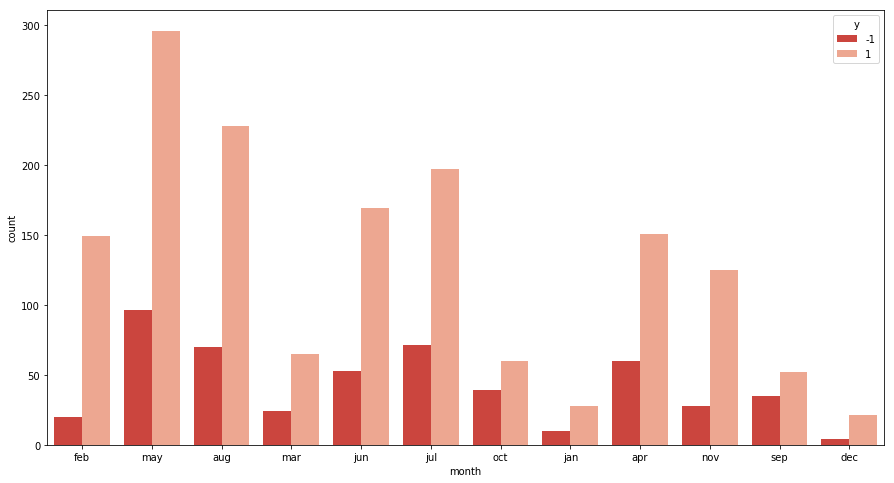

In [109]:
#語分類の傾向を観察
#最終接触月で調べる
plt.figure(figsize=(15, 8))
sns.countplot(x="month", hue='y', data=df_error, palette='Reds_r')

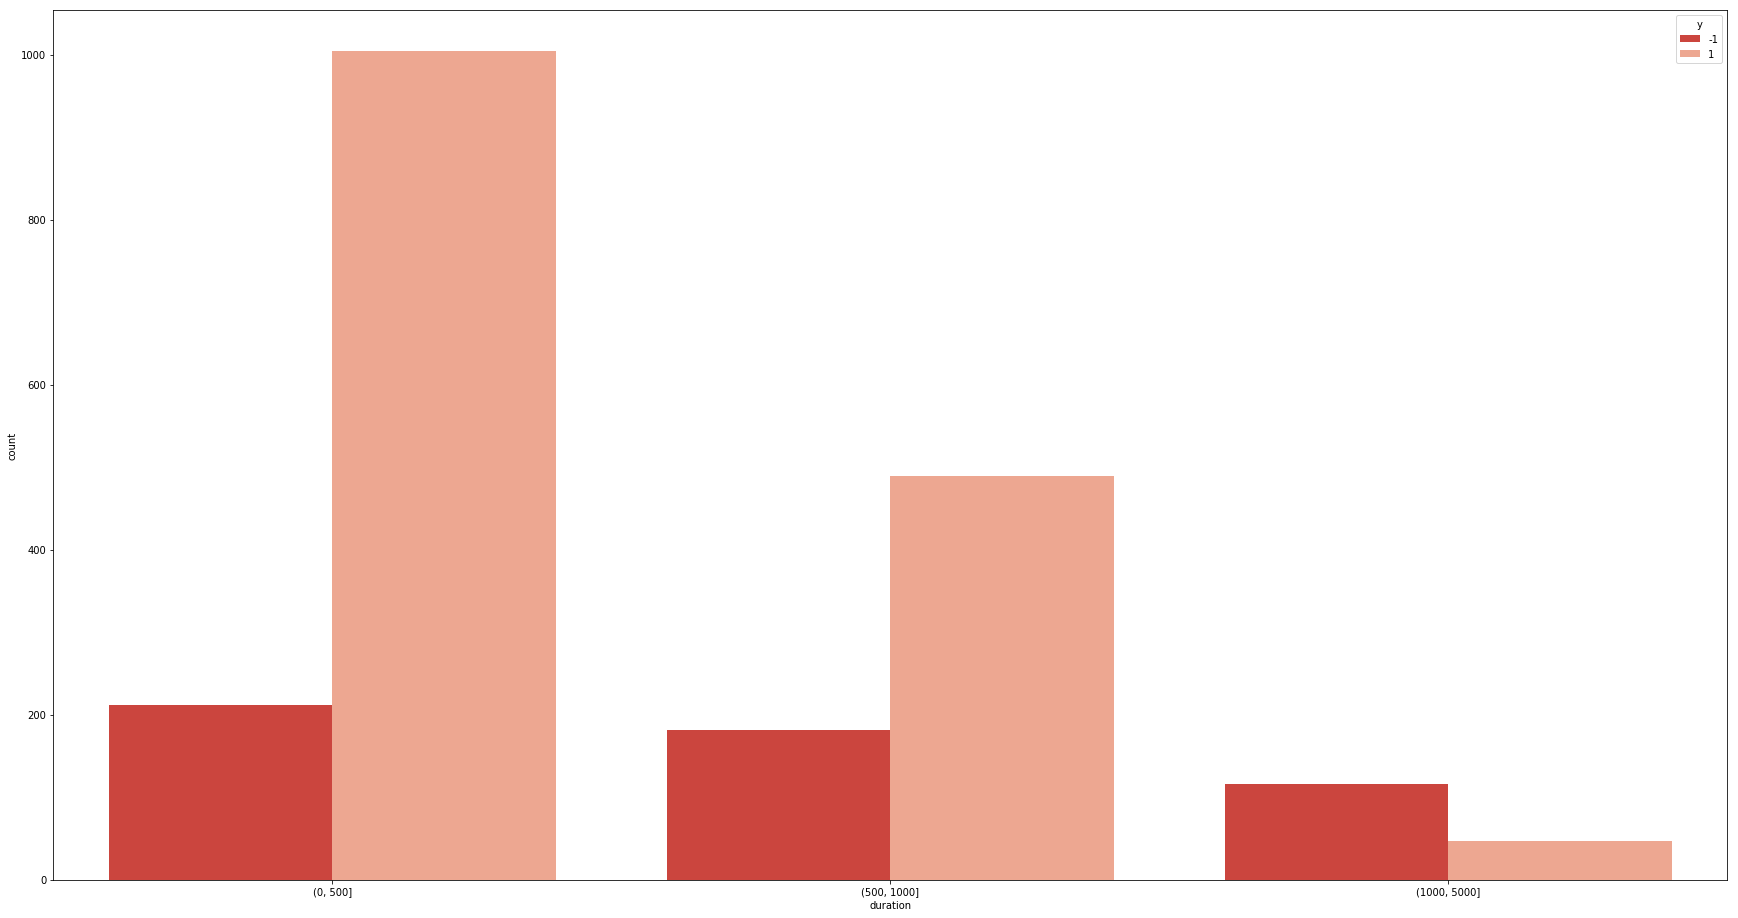

In [110]:
#最終接触時間を観察
plt.figure(figsize=(30, 16))
duration_cut = pd.cut(df_error['duration'], [0, 500, 1000,  5000])
sns.countplot(x=duration_cut, hue='y', data=df_error, palette='Reds_r')